In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, \
                                          classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import loguniform
import re 

# Preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# Algorithms
from sklearn.linear_model import LogisticRegression

# Dealing with warnings
import warnings
warnings.filterwarnings('ignore')

# Setting DataFrame's to show 100 max columns, instead of compressing then
pd.set_option('display.max_columns', 100)

In [2]:
people = pd.read_csv('../raw_data/people_analytics.csv')

In [11]:
pd.DataFrame(people.columns).r(5, -1)

SyntaxError: invalid syntax (<ipython-input-11-9d3616778e5e>, line 1)

In [40]:
# people_teste = pd.read_csv('../raw_data/people_analytics.csv')

In [41]:
people.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [42]:
# people['Attrition'] = people['Attrition'].map({
#                                                 'Yes': 1,
#                                                 'No': 0
#                                             })

In [43]:
people

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [44]:
# def camel_case_split(str): 
#     return '_'.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', str))

# new_columns = []
# for str in people.columns.tolist():
#     new_columns.append(camel_case_split(str).lower())
    
# people.columns = new_columns

In [45]:
people.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [46]:
# people.drop(columns = ['employee_count', 'over', 'standard_hours', 'employee_number'], inplace = True)

In [47]:
print('Dataset shape: ', people.shape)
people.head()

Dataset shape:  (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [48]:
class ColumnsRename(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, X, y = None):
        assert isinstance(X, pd.DataFrame)
        
        def camel_case_split(str): 
            return '_'.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', str))
        
        new_columns = []
        for str in X.columns.tolist():
            new_columns.append(camel_case_split(str).lower())
        
        X.columns = new_columns
        
        return X

In [218]:
ColumnsRename().fit_transform(people_dd)

,employee_number,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,592,36,No,Non-Travel,635,Sales,10,4,Medical,1,2,Male,32,3,3,Sales Executive,4,Single,9980,15318,1,Y,No,14,3,4,80,0,10,3,2,10,3,9,7
1,1545,33,No,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,4,Male,44,2,2,Manufacturing Director,2,Single,4320,24152,1,Y,No,13,3,4,80,0,5,2,3,5,3,0,2
2,1380,35,Yes,Travel_Frequently,662,Sales,18,4,Marketing,1,4,Female,67,3,2,Sales Executive,3,Married,4614,23288,0,Y,Yes,18,3,3,80,1,5,0,2,4,2,3,2
3,1092,40,No,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,1,Male,61,3,3,Healthcare Representative,4,Married,10322,26542,4,Y,No,20,4,4,80,1,14,6,3,11,10,11,1
4,1868,29,Yes,Travel_Frequently,459,Research & Development,24,2,Life Sciences,1,4,Male,73,2,1,Research Scientist,4,Single,2439,14753,1,Y,Yes,24,4,2,80,0,1,3,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,771,35,No,Non-Travel,1225,Research & Development,2,4,Life Sciences,1,4,Female,61,3,2,Healthcare Representative,1,Divorced,5093,4761,2,Y,No,11,3,1,80,1,16,2,4,1,0,0,0
364,1160,31,Yes,Travel_Frequently,874,Research & Development,15,3,Medical,1,3,Male,72,3,1,Laboratory Technician,3,Married,2610,6233,1,Y,No,12,3,3,80,1,2,5,2,2,2,2,2
365,957,41,No,Travel_Rarely,263,Research & Development,6,3,Medical,1,4,Male,59,3,1,Laboratory Technician,1,Single,4721,3119,2,Y,Yes,13,3,3,80,0,20,3,3,18,13,2,17
366,1363,48,No,Travel_Rarely,855,Research & Development,4,3,Life Sciences,1,4,Male,54,3,3,Manufacturing Director,4,Single,7898,18706,1,Y,No,11,3,3,80,0,11,2,3,10,9,0,8


In [81]:
class DropColumns(BaseEstimator, TransformerMixin):
    '''
    Searches for employee department and job level and classify its monthly income
    as below his/hers department average for his/hers specific job level.
    '''
    
    def __init__(self):
        pass
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, X, y = None):
#         assert isinstance(X, pd.DataFrame)
        
        X = X.drop(['employee_count', 'over', 'standard_hours', 'employee_number'], axis = 1)
        
        return X

In [219]:
DropColumns().fit_transform(people_dd)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,36,No,Non-Travel,635,Sales,10,4,Medical,2,Male,32,3,3,Sales Executive,4,Single,9980,15318,1,No,14,3,4,0,10,3,2,10,3,9,7
1,33,No,Travel_Rarely,575,Research & Development,25,3,Life Sciences,4,Male,44,2,2,Manufacturing Director,2,Single,4320,24152,1,No,13,3,4,0,5,2,3,5,3,0,2
2,35,Yes,Travel_Frequently,662,Sales,18,4,Marketing,4,Female,67,3,2,Sales Executive,3,Married,4614,23288,0,Yes,18,3,3,1,5,0,2,4,2,3,2
3,40,No,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,Male,61,3,3,Healthcare Representative,4,Married,10322,26542,4,No,20,4,4,1,14,6,3,11,10,11,1
4,29,Yes,Travel_Frequently,459,Research & Development,24,2,Life Sciences,4,Male,73,2,1,Research Scientist,4,Single,2439,14753,1,Yes,24,4,2,0,1,3,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,35,No,Non-Travel,1225,Research & Development,2,4,Life Sciences,4,Female,61,3,2,Healthcare Representative,1,Divorced,5093,4761,2,No,11,3,1,1,16,2,4,1,0,0,0
364,31,Yes,Travel_Frequently,874,Research & Development,15,3,Medical,3,Male,72,3,1,Laboratory Technician,3,Married,2610,6233,1,No,12,3,3,1,2,5,2,2,2,2,2
365,41,No,Travel_Rarely,263,Research & Development,6,3,Medical,4,Male,59,3,1,Laboratory Technician,1,Single,4721,3119,2,Yes,13,3,3,0,20,3,3,18,13,2,17
366,48,No,Travel_Rarely,855,Research & Development,4,3,Life Sciences,4,Male,54,3,3,Manufacturing Director,4,Single,7898,18706,1,No,11,3,3,0,11,2,3,10,9,0,8


In [52]:
class IncomeBlwDptJLAvg(BaseEstimator, TransformerMixin):
    '''
    Searches for employee department and job level and classify its monthly income
    as below his/hers department average for his/hers specific job level.
    '''
    
    def __init__(self):
        pass
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, X, y = None):
#         assert isinstance(X, pd.DataFrame)
        
        _minc_gb = X.groupby(['department', 'job_level'])['monthly_income'].median()
        
        departments = X['department'].unique().tolist()
        job_levels = X['job_level'].unique().tolist()
        
        for department in departments:
            for job_level in job_levels:
                X.loc[((X['department'] == department) & \
                       (X['job_level'] == job_level) & \
                       (X['monthly_income'] < _minc_gb[department, job_level])), \
                          'below_median_dpt_joblevel_monthly_income'] = 1

                X.loc[((X['department'] == department) & \
                       (X['job_level'] == job_level) & \
                       (X['monthly_income'] >= _minc_gb[department, job_level])), \
                          'below_median_dpt_joblevel_monthly_income'] = 0
                
#                 X['below_median_dpt_joblevel_monthly_income'].astype(int)
                
        return X

In [231]:
 people_dd[(people_dd['department'] == department[0]) & \
               (people_dd['job_level'] == job_level[0]) & \
               (people_dd['monthly_income'] < _minc_gb[department, job_level))

SyntaxError: invalid syntax (<ipython-input-231-f355e827f287>, line 3)

In [258]:
people_dd.loc[people_dd['department'] == 'Human Resources', 'job_level'].unique().tolist()

[2, 1, 4, 3]

In [265]:
_minc_gb = people_dd.groupby(['department', 'job_level'])['monthly_income'].median()

departments = people_dd['department'].unique().tolist()
# job_levels = people_dd.loc[people_dd[department], 'job_level'].unique().tolist()

for department in departments:
#     print(department)
    job_levels = people_dd.loc[people_dd['department'] == department, 'job_level'].unique().tolist()
    for job_level in job_levels:
            print(department, job_level)
            people_dd.loc[((people_dd['department'] == department) & \
                   (people_dd['job_level'] == job_level)), \
                      'below_median_dpt_joblevel_monthly_income'] = 0
        
            people_dd.loc[((people_dd['department'] == department) & \
                   (people_dd['job_level'] == job_level) & \
                   (people_dd['monthly_income'] < _minc_gb[department, job_level])), \
                      'below_median_dpt_joblevel_monthly_income'] = 1

Sales 3
Sales 2
Sales 1
Sales 4
Sales 5
Research & Development 2
Research & Development 3
Research & Development 1
Research & Development 4
Research & Development 5
Human Resources 2
Human Resources 1
Human Resources 4
Human Resources 3


In [243]:
_minc_gb = people_dd.groupby(['department', 'job_level'])['monthly_income'].median()
_minc_gb

department              job_level
Human Resources         1             2844.0
                        2             5148.0
                        3             9950.0
                        4            16437.0
Research & Development  1             2722.5
                        2             5482.0
                        3            10066.0
                        4            14411.0
                        5            19252.0
Sales                   1             2591.0
                        2             5486.0
                        3             9637.0
                        4            15427.0
                        5            18885.5
Name: monthly_income, dtype: float64

In [220]:
income_blw_avg = IncomeBlwDptJLAvg()
income_blw_avg.fit_transform(people_dd)
people_dd

KeyError: ('Human Resources', 5)

In [54]:
class EduFieldJobRole(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
#         assert isinstance(X, pd.DataFrame)
#         print(X.columns.values)
        X['edu_field_job_role'] = X['education_field'] + '_' + X['job_role']
        
        edu_field_job_role_map = { 
         'Human Resources_Human Resources': 0,
         'Human Resources_Manager': 0,
         'Life Sciences_Healthcare Representative': 0,
         'Life Sciences_Human Resources': 1,
         'Life Sciences_Laboratory Technician': 0,
         'Life Sciences_Manager': 1,
         'Life Sciences_Manufacturing Director': 0,
         'Life Sciences_Research Director': 0,
         'Life Sciences_Research Scientist': 0,
         'Life Sciences_Sales Executive': 1,
         'Life Sciences_Sales Representative': 1,
         'Marketing_Manager': 0,
         'Marketing_Sales Executive': 0,
         'Marketing_Sales Representative': 0,
         'Medical_Healthcare Representative': 0,
         'Medical_Human Resources': 1,
         'Medical_Laboratory Technician': 0,
         'Medical_Manager': 1,
         'Medical_Manufacturing Director': 0,
         'Medical_Research Director': 0,
         'Medical_Research Scientist': 0,
         'Medical_Sales Executive': 1,
         'Medical_Sales Representative': 1,
         'Other_Healthcare Representative': 0,
         'Other_Human Resources': 0,
         'Other_Laboratory Technician': 0,
         'Other_Manager': 0,
         'Other_Manufacturing Director': 0,
         'Other_Research Director': 0,
         'Other_Research Scientist': 0,
         'Other_Sales Executive': 0,
         'Other_Sales Representative': 0,
         'Technical Degree_Healthcare Representative': 0,
         'Technical Degree_Human Resources': 0,
         'Technical Degree_Laboratory Technician': 0,
         'Technical Degree_Manager': 0,
         'Technical Degree_Manufacturing Director': 0,
         'Technical Degree_Research Director': 0,
         'Technical Degree_Research Scientist': 0,
         'Technical Degree_Sales Executive': 0,
         'Technical Degree_Sales Representative': 0
        }
        
        X['job_role_diff_edu_field'] = X['edu_field_job_role'].map(edu_field_job_role_map)
        
        X.drop('edu_field_job_role', axis = 1, inplace = True)
        
        return X

In [55]:
EduFieldJobRole().fit_transform(people)
people

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0.0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1.0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1.0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0.0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,1.0,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,1.0,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0.0,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,1.0,1


In [56]:
class PromotedLastTwoYears(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        
        X['promoted_last_2_years'] = \
        X['years_since_last_promotion'].apply(lambda x: 1 if x <= 2 else 0)
        
        return X

In [57]:
PromotedLastTwoYears().fit_transform(people)
people

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0.0,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1.0,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1.0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0.0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,1.0,0,1
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,1.0,0,1
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0.0,0,1
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,1.0,1,1


In [58]:
class IncomePerYearsWorked(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
#         assert isinstance(X, pd.DataFrame)
        
        total_workin_years_min = X[X['total_working_years'] == 0]['monthly_income'].min()
        
        def get_income_per_years_worked(x):
            if x == 0:
                X['m_income_per_total_years_worked'] = total_workin_years_min
            else:
                X['m_income_per_total_years_worked'] = \
                        X['monthly_income'] / X['total_working_years']
                
        X['total_working_years'].apply(get_income_per_years_worked)
        
        X[X['m_income_per_total_years_worked'] == np.inf]['m_income_per_total_years_worked'] = 1
        X['m_income_per_total_years_worked'].replace(np.inf, total_workin_years_min, inplace = True)
        
        return X

In [59]:
IncomePerYearsWorked().fit_transform(people)
people

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0.0,1,1,749.125000
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1.0,0,1,513.000000
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1.0,0,1,298.571429
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0.0,0,0,363.625000
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0.0,0,1,578.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,1.0,0,1,151.235294
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,1.0,0,1,1110.111111
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0.0,0,1,1023.666667
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,1.0,1,1,317.058824


In [60]:
class IncomePerAge(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
#         assert isinstance(X, pd.DataFrame)
        X['m_income_per_age'] = X['monthly_income'] / X['age']
        
        return X

In [61]:
IncomePerAge().fit_transform(people)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0.0,1,1,749.125000,146.170732
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1.0,0,1,513.000000,104.693878
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1.0,0,1,298.571429,56.486486
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0.0,0,0,363.625000,88.151515
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0.0,0,1,578.000000,128.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,1.0,0,1,151.235294,71.416667
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,1.0,0,1,1110.111111,256.179487
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0.0,0,1,1023.666667,227.481481
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,1.0,1,1,317.058824,110.000000


In [62]:
people

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0.0,1,1,749.125000,146.170732
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1.0,0,1,513.000000,104.693878
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1.0,0,1,298.571429,56.486486
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0.0,0,0,363.625000,88.151515
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0.0,0,1,578.000000,128.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,1.0,0,1,151.235294,71.416667
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,1.0,0,1,1110.111111,256.179487
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0.0,0,1,1023.666667,227.481481
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,1.0,1,1,317.058824,110.000000


In [63]:
class SalaryHikeBelowMedian(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        assert isinstance(X, pd.DataFrame)
        
        salary_hike_median = X['percent_salary_hike'].median()

        X['below_median_pct_salary_hike'] = \
                X['percent_salary_hike'].apply(lambda x: 1 if x < salary_hike_median else 0)
        
        return X

In [64]:
salary_hike = SalaryHikeBelowMedian()
salary_hike.fit_transform(people)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0.0,1,1,749.125000,146.170732,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1.0,0,1,513.000000,104.693878,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1.0,0,1,298.571429,56.486486,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0.0,0,0,363.625000,88.151515,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0.0,0,1,578.000000,128.444444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,1.0,0,1,151.235294,71.416667,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,1.0,0,1,1110.111111,256.179487,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0.0,0,1,1023.666667,227.481481,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,1.0,1,1,317.058824,110.000000,0


In [65]:
# class FormatDatset(BaseEstimator, TransformerMixin):
    
#     def __init__(self):
#         pass
    
#     def fit(self, X, y = None):
#         return self
    
#     def transform(self, X, y = None):
#         assert isinstance(X, pd.DataFrame)
        
        

In [66]:
class MapBooleans(BaseEstimator, TransformerMixin):
        
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        assert isinstance(X, pd.DataFrame)
        
        X['attrition'] = X['attrition'].map({'No': 0, 'Yes': 1}) # COME BACK TO THIS IN THE FUTURE!!!

        X['gender_male'] = X['gender'].map({'Female': 0, 'Male': 1})

        X['over_time'] = X['over_time'].map({'No': 0, 'Yes': 1})
        
        business_travel_map = {
                                'Non-Travel': 0, 
                                'Travel_Rarely': 1, 
                                'Travel_Frequently': 2
                               }

        X['business_travel'] = X['business_travel'].map(business_travel_map)
        
        X = X.drop('gender', axis = 1)
        
        return X

In [67]:
map_bools = MapBooleans()
map_bools.fit_transform(people)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike,gender_male
0,41,1,1,1102,Sales,1,2,Life Sciences,2,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0.0,1,1,749.125000,146.170732,1,0
1,49,0,2,279,Research & Development,8,1,Life Sciences,3,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1.0,0,1,513.000000,104.693878,0,1
2,37,1,1,1373,Research & Development,2,2,Other,4,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1.0,0,1,298.571429,56.486486,0,1
3,33,0,2,1392,Research & Development,3,4,Life Sciences,4,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0.0,0,0,363.625000,88.151515,1,0
4,27,0,1,591,Research & Development,2,1,Medical,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0.0,0,1,578.000000,128.444444,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,Research & Development,23,2,Medical,3,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,1.0,0,1,151.235294,71.416667,0,1
1466,39,0,1,613,Research & Development,6,1,Medical,4,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,1.0,0,1,1110.111111,256.179487,0,1
1467,27,0,1,155,Research & Development,4,3,Life Sciences,2,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0.0,0,1,1023.666667,227.481481,0,1
1468,49,0,2,1023,Sales,2,3,Medical,4,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,1.0,1,1,317.058824,110.000000,0,1


In [68]:
people

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike,gender_male
0,41,1,1,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0.0,1,1,749.125000,146.170732,1,0
1,49,0,2,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1.0,0,1,513.000000,104.693878,0,1
2,37,1,1,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1.0,0,1,298.571429,56.486486,0,1
3,33,0,2,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0.0,0,0,363.625000,88.151515,1,0
4,27,0,1,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0.0,0,1,578.000000,128.444444,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,1.0,0,1,151.235294,71.416667,0,1
1466,39,0,1,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,1.0,0,1,1110.111111,256.179487,0,1
1467,27,0,1,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0.0,0,1,1023.666667,227.481481,0,1
1468,49,0,2,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,1.0,1,1,317.058824,110.000000,0,1


In [69]:
class FinalColumnsDrop(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        assert isinstance(X, pd.DataFrame)
        
        X = X.drop(columns = [
                               'job_level', 
                               'monthly_income', 
                               'years_since_last_promotion', 
                               'total_working_years', 
                               'percent_salary_hike',
                               'years_at_company',
                               'performance_rating',
                               'department', # not numeric
                               'education_field', # not numeric
                               'job_role', 
                               'marital_status',
                               'age',
                               'job_involvement',
                               'work_life_balance',
                         ])
        return X 

In [70]:
FinalColumnsDrop().fit_transform(people)

,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_satisfaction,monthly_rate,num_companies_worked,over_time,relationship_satisfaction,stock_option_level,training_times_last_year,years_in_current_role,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike,gender_male
0,1,1,1102,1,2,2,Female,94,4,19479,8,1,1,0,0,4,5,0.0,1,1,749.125000,146.170732,1,0
1,0,2,279,8,1,3,Male,61,2,24907,1,0,4,1,3,7,7,1.0,0,1,513.000000,104.693878,0,1
2,1,1,1373,2,2,4,Male,92,3,2396,6,1,2,0,3,0,0,1.0,0,1,298.571429,56.486486,0,1
3,0,2,1392,3,4,4,Female,56,3,23159,1,1,3,0,3,7,0,0.0,0,0,363.625000,88.151515,1,0
4,0,1,591,2,1,1,Male,40,2,16632,9,0,4,1,3,2,2,0.0,0,1,578.000000,128.444444,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2,884,23,2,3,Male,41,4,12290,4,0,3,1,3,2,3,1.0,0,1,151.235294,71.416667,0,1
1466,0,1,613,6,1,4,Male,42,1,21457,4,0,1,1,5,7,7,1.0,0,1,1110.111111,256.179487,0,1
1467,0,1,155,4,3,2,Male,87,2,5174,1,1,2,1,0,2,3,0.0,0,1,1023.666667,227.481481,0,1
1468,0,2,1023,2,3,4,Male,63,2,13243,2,0,4,0,3,6,8,1.0,1,1,317.058824,110.000000,0,1


In [71]:
# class Smoting(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         pass
    
#     def fit(self, X, y = None):
#         return self
    
#     def transform(self, X, y = None):
#         assert isinstance(X, pd.DataFrame)
        
#         X_cols = X.columns.tolist()
#         X = X.drop('attrition')
#         y = X['attrition']
        
        
#         X_smote, y_smote = SMOTE(random_state = 0).fit_resample(X, y)
        
#         X = X_smote.merge(y_smote, how = 'inner', left_index = True, right_index = True)
#         X = pd.DataFrame(X, columns = X_cols)
#         print(X)
#         return None

In [72]:
# income_blwdptjlavg = ColumnTransformer([('IncomeBlwDptJLAvg', IncomeBlwDptJLAvg(), ['total_working_years', 'monthly_income']),
#                                         ()])

In [ ]:
df_setup_pipe = make_pipeline(
                              ColumnsRename(),
                              DropColumns(),
                              IncomeBlwDptJLAvg(),
                              EduFieldJobRole(),
                              PromotedLastTwoYears(),
                              IncomePerYearsWorked(),
                              IncomePerAge(),
                              SalaryHikeBelowMedian(),
                              MapBooleans(),
                              FinalColumnsDrop()
                             )


to_robust_scale = [
    'distance_from_home',
    'education',
    'num_companies_worked',
    'stock_option_level',
    'training_times_last_year',
    'years_in_current_role',
    'years_with_curr_manager',
    'm_income_per_total_years_worked',
    'm_income_per_age'
]

to_stand_scale = [
    set(people.columns.tolist()) - set(to_robust_scale)
]

to_stand_scale = list(to_stand_scale[0])


scaler_pipe = ColumnTransformer([('robust_scaler', RobustScaler(), to_robust_scale),
                                 ('standard_scaler', StandardScaler(), to_stand_scale)])

final_pipe = Pipeline(steps = [
    ('df_setup', df_setup_pipe),
    ('scaler', scaler_pipe)
])

In [ ]:
to_stand_scale = [set(people.columns.tolist()) - set(to_robust_scale)]
to_stand_scale = list(to_stand_scale[0])
to_stand_scale

In [ ]:
people_topipe2 = pd.read_csv('../raw_data/people_analytics.csv')

In [ ]:
people_topipe2

In [ ]:
df_setup_pipe.fit_transform(people_topipe2)

In [ ]:
people_topipe2

In [ ]:
scaler_pipe.fit_transform(people_topipe2)

In [ ]:
final_pipe.fit_transform(people_topipe2)

------

In [199]:
def get_data(local = True, **kwargs):
    """
    method to get the training data locally or from google cloud bucket"""
#     client = storage.Client()
    if local:
        path = "/Users/renanfmoises/code/renanfmoises/people-analytics/raw_data/people_analytics.csv"
    else:
        pass

    df = pd.read_csv(path)
    return df

In [200]:
pa = get_data()

In [201]:
pa.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [202]:
def clean_df(df):

    pipe = make_pipeline(
                            ColumnsRename(),
                            DropColumns(),
                            IncomeBlwDptJLAvg(),
                            EduFieldJobRole(),
                            PromotedLastTwoYears(),
                            IncomePerYearsWorked(),
                            IncomePerAge(),
                            SalaryHikeBelowMedian(),
                            MapBooleans(),
                            FinalColumnsDrop()
    )
#     df.drop('attrition', axis = 1, inplace = True)
    df = pipe.fit_transform(df)

    return df

In [203]:
pa = clean_df(pa)
pa

,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_satisfaction,monthly_rate,num_companies_worked,over_time,relationship_satisfaction,stock_option_level,training_times_last_year,years_in_current_role,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike,gender_male
0,1,1,1102,1,2,2,94,4,19479,8,1,1,0,0,4,5,0.0,1,1,749.125000,146.170732,1,0
1,0,2,279,8,1,3,61,2,24907,1,0,4,1,3,7,7,1.0,0,1,513.000000,104.693878,0,1
2,1,1,1373,2,2,4,92,3,2396,6,1,2,0,3,0,0,1.0,0,1,298.571429,56.486486,0,1
3,0,2,1392,3,4,4,56,3,23159,1,1,3,0,3,7,0,0.0,0,0,363.625000,88.151515,1,0
4,0,1,591,2,1,1,40,2,16632,9,0,4,1,3,2,2,0.0,0,1,578.000000,128.444444,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2,884,23,2,3,41,4,12290,4,0,3,1,3,2,3,1.0,0,1,151.235294,71.416667,0,1
1466,0,1,613,6,1,4,42,1,21457,4,0,1,1,5,7,7,1.0,0,1,1110.111111,256.179487,0,1
1467,0,1,155,4,3,2,87,2,5174,1,1,2,1,0,2,3,0.0,0,1,1023.666667,227.481481,0,1
1468,0,2,1023,2,3,4,63,2,13243,2,0,4,0,3,6,8,1.0,1,1,317.058824,110.000000,0,1


In [197]:
def scale_data(df):
    to_robust_scale = [
                        'attrition',
                        'business_travel',
                        'daily_rate',
                        'distance_from_home',
                        'education',
                        'environment_satisfaction',
                        'hourly_rate',
                        'job_satisfaction',
                        'monthly_rate',
                        'num_companies_worked',
                        'over_time',
                        'relationship_satisfaction',
                        'stock_option_level',
                        'training_times_last_year',
                        'years_in_current_role',
                        'years_with_curr_manager',
                        'below_median_dpt_joblevel_monthly_income',
                        'job_role_diff_edu_field',
                        'promoted_last_2_years',
                        'm_income_per_total_years_worked',
                        'm_income_per_age',
                        'below_median_pct_salary_hike',
                        'gender_male'
    ]

    df[to_robust_scale] = RobustScaler().fit_transform(df[to_robust_scale])

#     df[to_stand_scale] = StandardScaler().fit_transform(df[to_stand_scale])

    return df

In [198]:
# pa = scale_data(pa)

,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_satisfaction,monthly_rate,num_companies_worked,over_time,relationship_satisfaction,stock_option_level,training_times_last_year,years_in_current_role,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike,gender_male
0,1.0,0.0,0.433526,-0.500000,-0.5,-0.5,0.783217,0.5,0.422369,2.000000,1.0,-1.0,-1.0,-3.0,0.2,0.4,0.0,1.0,0.0,0.338566,0.039925,1.0,-1.0
1,0.0,1.0,-0.755780,0.083333,-1.0,0.0,-0.139860,-0.5,0.859600,-0.333333,0.0,0.5,0.0,0.0,0.8,0.8,1.0,0.0,0.0,-0.207835,-0.278502,0.0,0.0
2,1.0,0.0,0.825145,-0.416667,-0.5,0.5,0.727273,0.0,-0.953683,1.333333,1.0,-0.5,-1.0,0.0,-0.6,-0.6,1.0,0.0,0.0,-0.704030,-0.648602,0.0,0.0
3,0.0,1.0,0.852601,-0.333333,0.5,0.5,-0.279720,0.0,0.718797,-0.333333,1.0,0.0,-1.0,0.0,0.8,-0.6,0.0,0.0,-1.0,-0.553494,-0.405502,1.0,-1.0
4,0.0,0.0,-0.304913,-0.416667,-1.0,-1.0,-0.727273,-0.5,0.193040,2.333333,0.0,0.5,0.0,0.0,-0.2,-0.2,0.0,0.0,0.0,-0.057423,-0.096164,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.118497,1.333333,-0.5,0.0,-0.699301,0.5,-0.156712,0.666667,0.0,0.0,0.0,0.0,-0.2,0.0,1.0,0.0,0.0,-1.044971,-0.533979,0.0,0.0
1466,0.0,0.0,-0.273121,-0.083333,-1.0,0.5,-0.671329,-1.0,0.581699,0.666667,0.0,-1.0,0.0,2.0,0.8,0.8,1.0,0.0,0.0,1.173900,0.884489,0.0,0.0
1467,0.0,0.0,-0.934971,-0.250000,0.0,-0.5,0.587413,-0.5,-0.729913,-0.333333,1.0,-0.5,0.0,-3.0,-0.2,0.0,0.0,0.0,0.0,0.973865,0.664167,0.0,0.0
1468,0.0,1.0,0.319364,-0.416667,0.0,0.5,-0.083916,-0.5,-0.079947,0.000000,0.0,0.5,-1.0,0.0,0.6,1.0,1.0,1.0,0.0,-0.661250,-0.237766,0.0,0.0


In [190]:
pa.columns.tolist()

['attrition',
 'business_travel',
 'daily_rate',
 'distance_from_home',
 'education',
 'environment_satisfaction',
 'hourly_rate',
 'job_satisfaction',
 'monthly_rate',
 'num_companies_worked',
 'over_time',
 'relationship_satisfaction',
 'stock_option_level',
 'training_times_last_year',
 'years_in_current_role',
 'years_with_curr_manager',
 'below_median_dpt_joblevel_monthly_income',
 'job_role_diff_edu_field',
 'promoted_last_2_years',
 'm_income_per_total_years_worked',
 'm_income_per_age',
 'below_median_pct_salary_hike',
 'gender_male']

<Figure size 720x720 with 0 Axes>

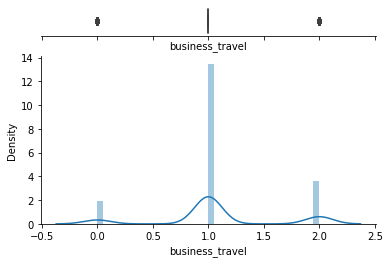

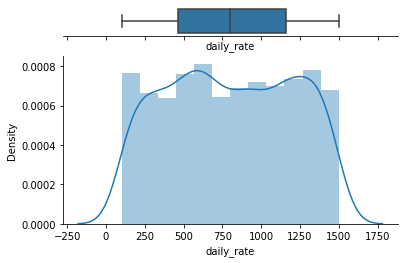

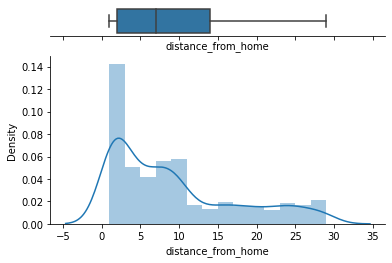

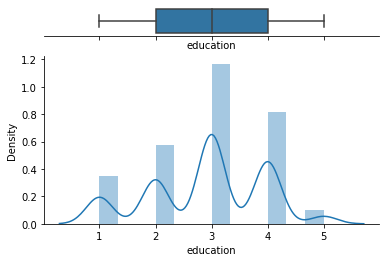

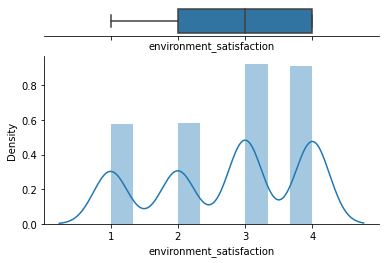

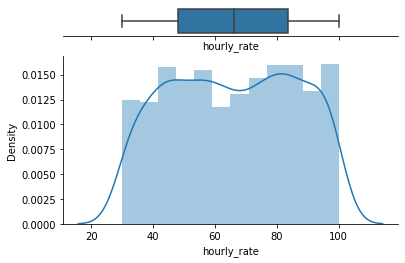

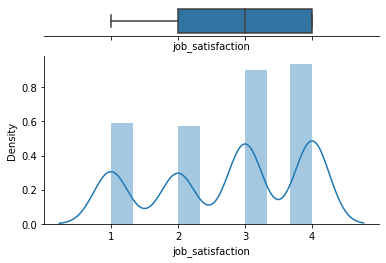

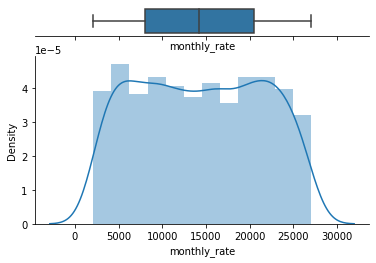

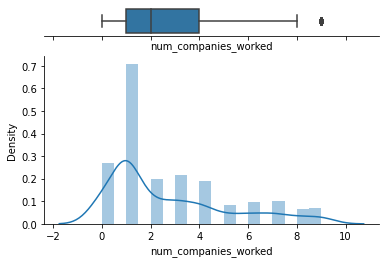

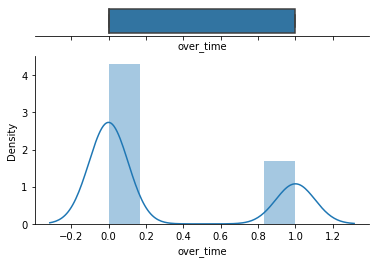

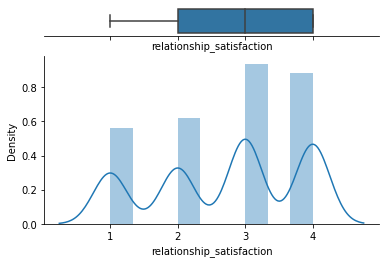

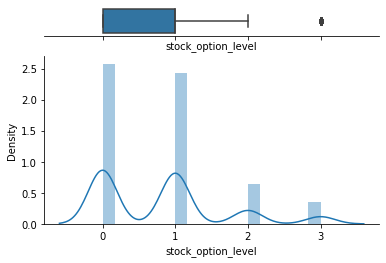

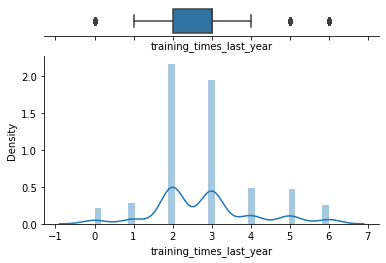

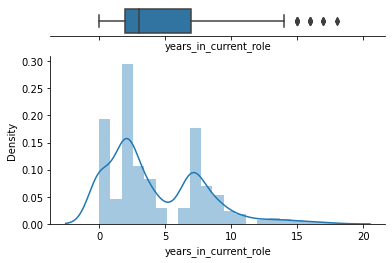

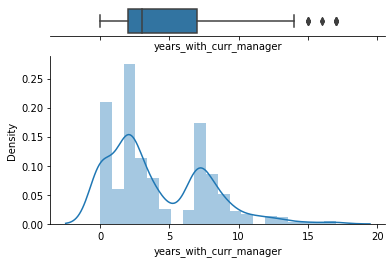

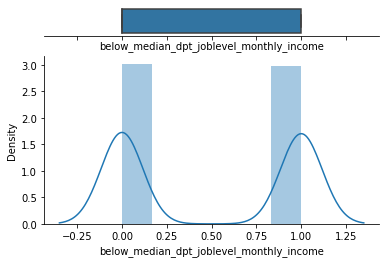

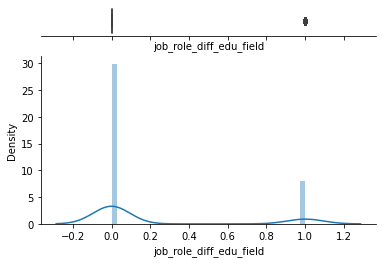

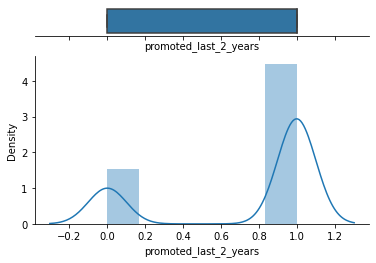

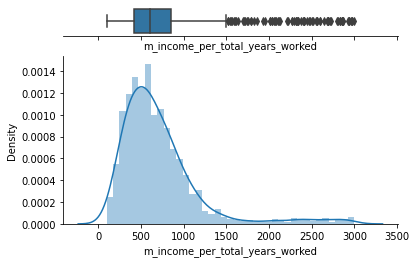

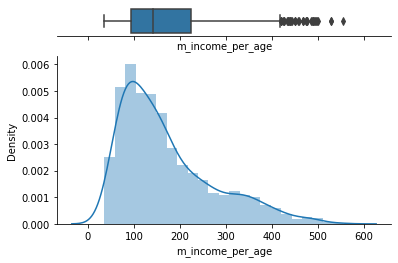

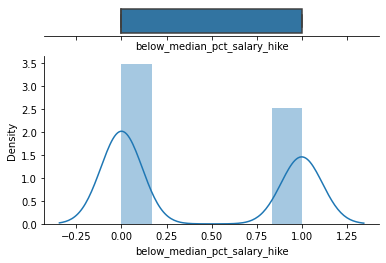

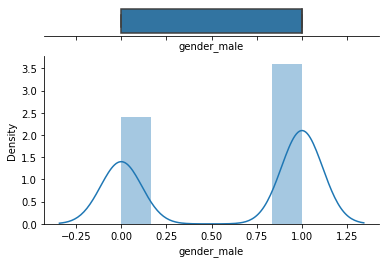

In [205]:
plt.figure(figsize = (10, 10))
for i, feature in enumerate(pa.drop('attrition', axis = 1).columns.tolist()):
#     for i in plt.subplot(2, 2, i + 1):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(pa[feature], ax=ax_box)
    sns.distplot(pa[feature], ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True);
    


In [206]:
    
to_robust_scale = [
    'business_travel',
    'num_companies_worked',
    'stock_option_level',
    'training_times_last_year',
    'years_in_current_role',
    'years_with_curr_manager',
    'm_income_per_total_years_worked',
    'm_income_per_age',
]

In [214]:
(set(pa.columns) - set(to_robust_scale))

{'attrition',
 'below_median_dpt_joblevel_monthly_income',
 'below_median_pct_salary_hike',
 'daily_rate',
 'distance_from_home',
 'education',
 'environment_satisfaction',
 'gender_male',
 'hourly_rate',
 'job_role_diff_edu_field',
 'job_satisfaction',
 'monthly_rate',
 'over_time',
 'promoted_last_2_years',
 'relationship_satisfaction'}

In [215]:
pa['over_time'].value_counts()

0    1054
1     416
Name: over_time, dtype: int64

In [ ]:
to_stand_scale = [
#     'attrition',
#     'below_median_dpt_joblevel_monthly_income',
#     'below_median_pct_salary_hike',
    'daily_rate',
    'distance_from_home',
    'education',
    'environment_satisfaction',
#     'gender_male',
    'hourly_rate',
#     'job_role_diff_edu_field',
    'job_satisfaction',
    'monthly_rate',
#     'over_time',
#     'promoted_last_2_years',
    'relationship_satisfaction'
]

In [216]:
people_dd = pd.read_csv('../raw_data/dd_people_test2.csv')

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,592,36,No,Non-Travel,635,Sales,10,4,Medical,1,2,Male,32,3,3,Sales Executive,4,Single,9980,15318,1,Y,No,14,3,4,80,0,10,3,2,10,3,9,7
1,1545,33,No,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,4,Male,44,2,2,Manufacturing Director,2,Single,4320,24152,1,Y,No,13,3,4,80,0,5,2,3,5,3,0,2
2,1380,35,Yes,Travel_Frequently,662,Sales,18,4,Marketing,1,4,Female,67,3,2,Sales Executive,3,Married,4614,23288,0,Y,Yes,18,3,3,80,1,5,0,2,4,2,3,2
3,1092,40,No,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,1,Male,61,3,3,Healthcare Representative,4,Married,10322,26542,4,Y,No,20,4,4,80,1,14,6,3,11,10,11,1
4,1868,29,Yes,Travel_Frequently,459,Research & Development,24,2,Life Sciences,1,4,Male,73,2,1,Research Scientist,4,Single,2439,14753,1,Y,Yes,24,4,2,80,0,1,3,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,771,35,No,Non-Travel,1225,Research & Development,2,4,Life Sciences,1,4,Female,61,3,2,Healthcare Representative,1,Divorced,5093,4761,2,Y,No,11,3,1,80,1,16,2,4,1,0,0,0
364,1160,31,Yes,Travel_Frequently,874,Research & Development,15,3,Medical,1,3,Male,72,3,1,Laboratory Technician,3,Married,2610,6233,1,Y,No,12,3,3,80,1,2,5,2,2,2,2,2
365,957,41,No,Travel_Rarely,263,Research & Development,6,3,Medical,1,4,Male,59,3,1,Laboratory Technician,1,Single,4721,3119,2,Y,Yes,13,3,3,80,0,20,3,3,18,13,2,17
366,1363,48,No,Travel_Rarely,855,Research & Development,4,3,Life Sciences,1,4,Male,54,3,3,Manufacturing Director,4,Single,7898,18706,1,Y,No,11,3,3,80,0,11,2,3,10,9,0,8
